In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data-export.csv", header=1)

In [ ]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [ ]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel Group","DateHour","Users","Sessions","Engaged Sessions","Avg Engagement Time Per Session","Engaged Sessions Per User","Events Per Session","Engagement Rate","Event Count"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Channel Group                    3181 non-null   object 
 1   DateHour                         3181 non-null   int64  
 2   Users                            3181 non-null   int64  
 3   Sessions                         3181 non-null   int64  
 4   Engaged Sessions                 3181 non-null   int64  
 5   Avg Engagement Time Per Session  3181 non-null   float64
 6   Engaged Sessions Per User        3181 non-null   float64
 7   Events Per Session               3181 non-null   float64
 8   Engagement Rate                  3181 non-null   float64
 9   Event Count                      3181 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.6+ KB


In [ ]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors="coerce")

In [ ]:
numeric_cols = df.columns.drop(["Channel Group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
df["Hour"] = df["DateHour"].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Channel Group                    3181 non-null   object        
 1   DateHour                         3181 non-null   datetime64[ns]
 2   Users                            3181 non-null   int64         
 3   Sessions                         3181 non-null   int64         
 4   Engaged Sessions                 3181 non-null   int64         
 5   Avg Engagement Time Per Session  3181 non-null   float64       
 6   Engaged Sessions Per User        3181 non-null   float64       
 7   Events Per Session               3181 non-null   float64       
 8   Engagement Rate                  3181 non-null   float64       
 9   Event Count                      3181 non-null   int64         
 10  Hour                             3181 non-null   int32      

In [ ]:
sns.set(style="white")

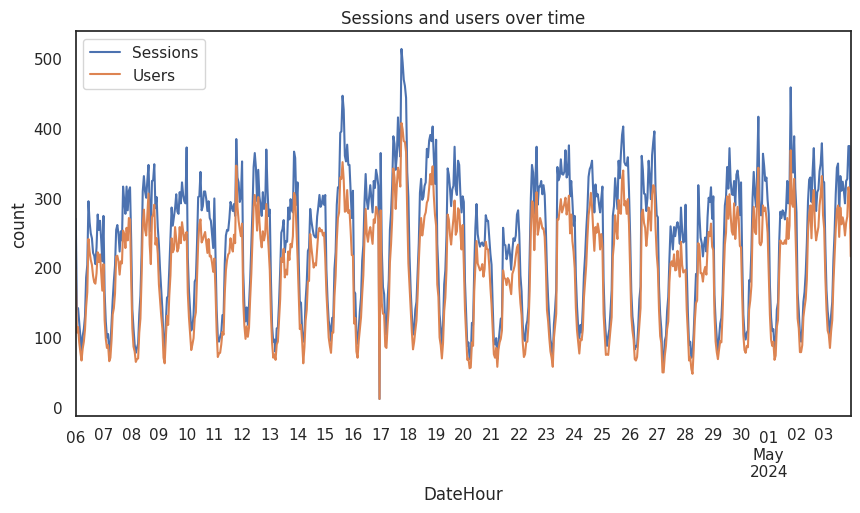

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

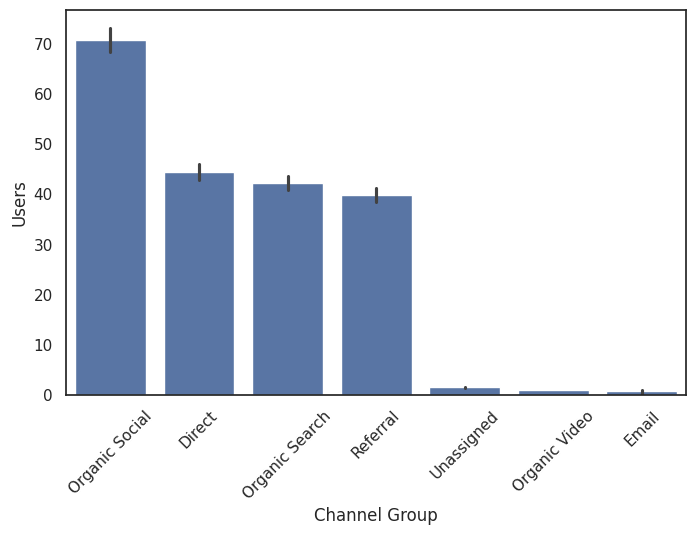

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Channel Group",
    y="Users"
)
plt.xticks(rotation=45)
plt.show()

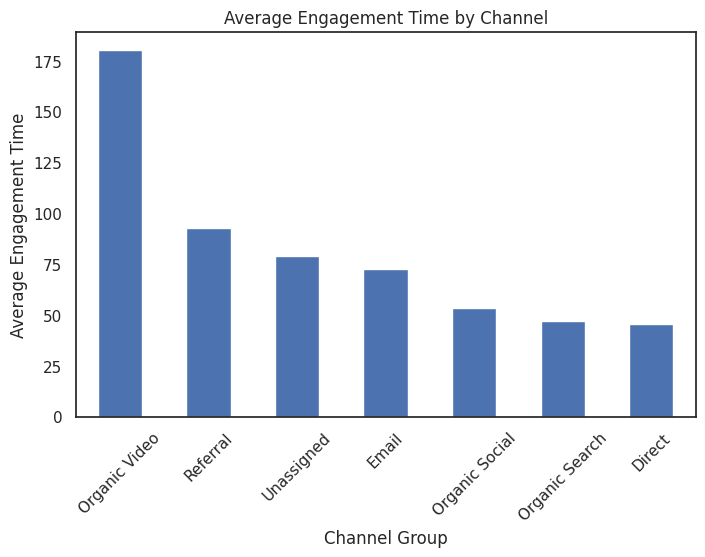

In [ ]:
channel_engagement = df.groupby("Channel Group")["Avg Engagement Time Per Session"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
channel_engagement.plot(kind="bar")
plt.title("Average Engagement Time by Channel")
plt.ylabel("Average Engagement Time")
plt.xticks(rotation=45)
plt.show()

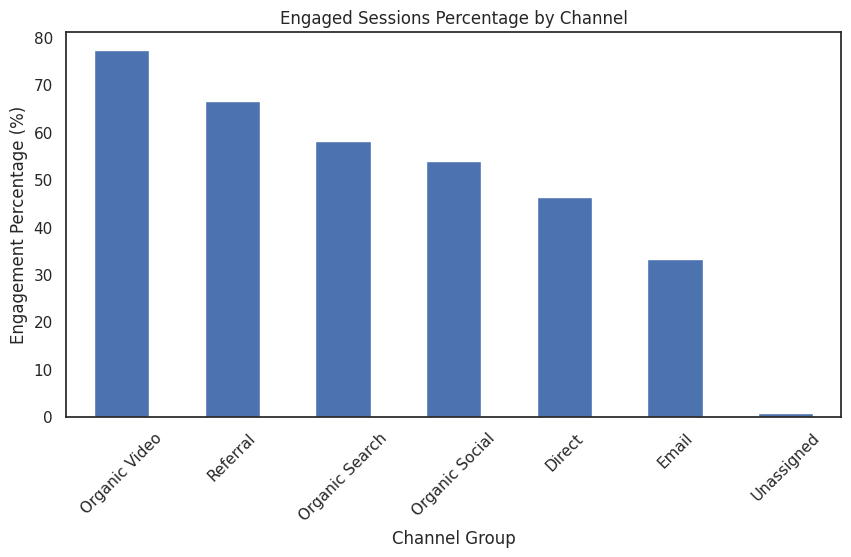

In [ ]:
channel_sessions = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum()

channel_sessions["Engagement_Percentage"] = (
    channel_sessions["Engaged Sessions"] / channel_sessions["Sessions"]
) * 100

channel_sessions = channel_sessions.sort_values("Engagement_Percentage", ascending=False)

channel_sessions["Engagement_Percentage"].plot(kind="bar", figsize=(10,5))

plt.title("Engaged Sessions Percentage by Channel")
plt.ylabel("Engagement Percentage (%)")
plt.xticks(rotation=45)
plt.show()

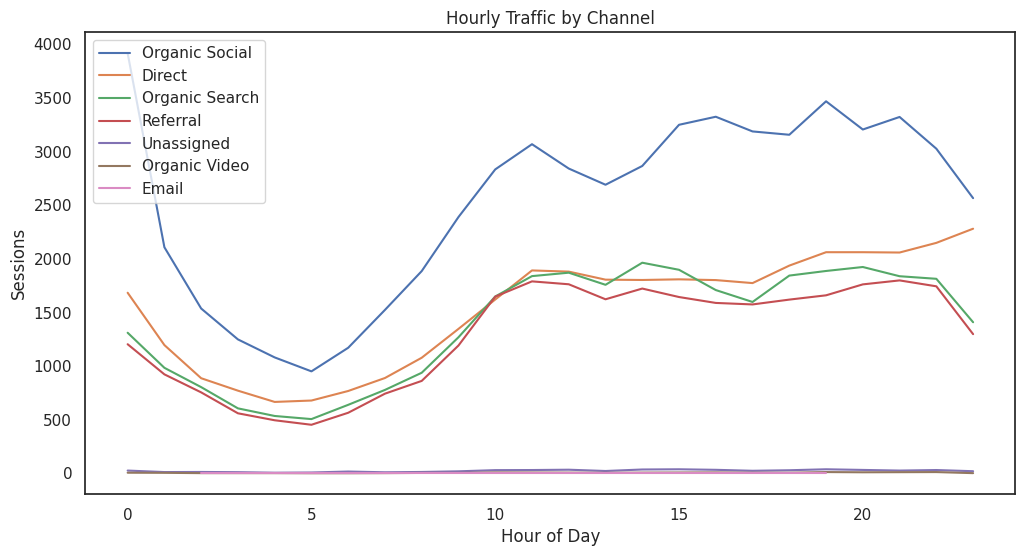

Correlation between Sessions and Engagement Rate: 0.30580286912975174


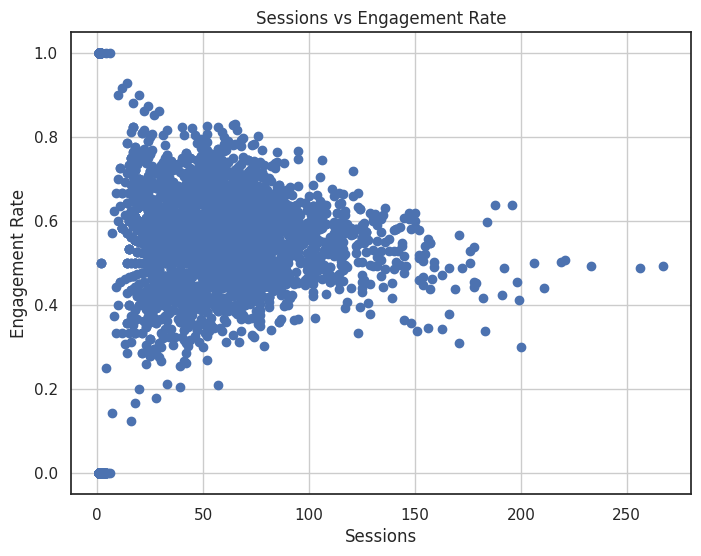

In [ ]:
hourly_traffic = df.groupby(["Channel Group", "Hour"])["Sessions"].sum().reset_index()

plt.figure(figsize=(12,6))

for channel in df["Channel Group"].unique():
    data = hourly_traffic[hourly_traffic["Channel Group"] == channel]
    plt.plot(data["Hour"], data["Sessions"], label=channel)

plt.title("Hourly Traffic by Channel")
plt.xlabel("Hour of Day")
plt.ylabel("Sessions")
plt.legend()
plt.show()

correlation = df["Sessions"].corr(df["Engagement Rate"])
print("Correlation between Sessions and Engagement Rate:", correlation)

plt.figure(figsize=(8,6))
plt.scatter(df["Sessions"], df["Engagement Rate"])
plt.title("Sessions vs Engagement Rate")
plt.xlabel("Sessions")
plt.ylabel("Engagement Rate")
plt.grid(True)
plt.show()